In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [112]:
df = pd.read_csv("COCOMO-revised.csv")
df = df.drop(columns=["categorical output", "shorter convetion for output"])
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()


In [113]:
print(pd.DataFrame(df.isnull().sum()))

            0
red.br      0
proj.no.    0
e           0
pemi        0
size_kloc   0
act_effort  0


/tmp/ipykernel_654768/26796010.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['e'], df['act_effort'], df['pemi'], df['size_kloc']], labels=['e', 'act_effort', 'pemi', 'size_kloc'])


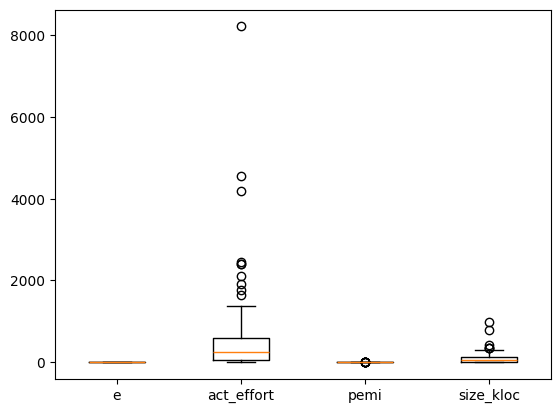

In [114]:
plt.Figure(figsize=(10,5))
plt.boxplot([df['e'], df['act_effort'], df['pemi'], df['size_kloc']], labels=['e', 'act_effort', 'pemi', 'size_kloc'])
plt.show()

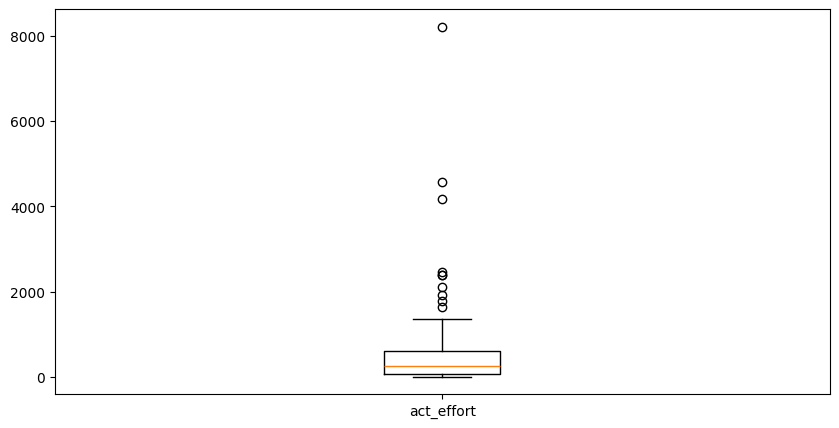

In [115]:
plt.figure(figsize=(10,5))
plt.boxplot(df['act_effort'], tick_labels=['act_effort'])
plt.show()

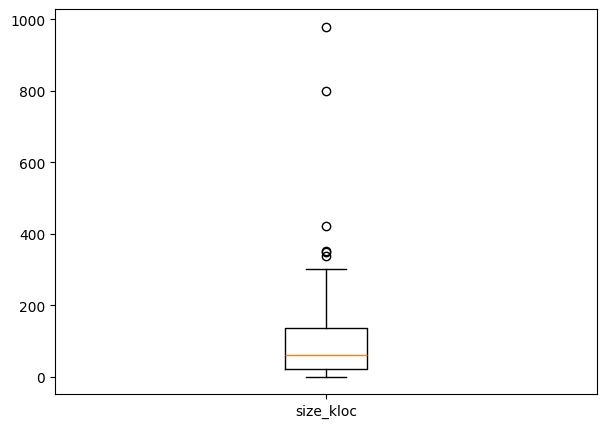

In [116]:
plt.figure(figsize=(7, 5))
plt.boxplot(df['size_kloc'], tick_labels=['size_kloc'])
plt.show()

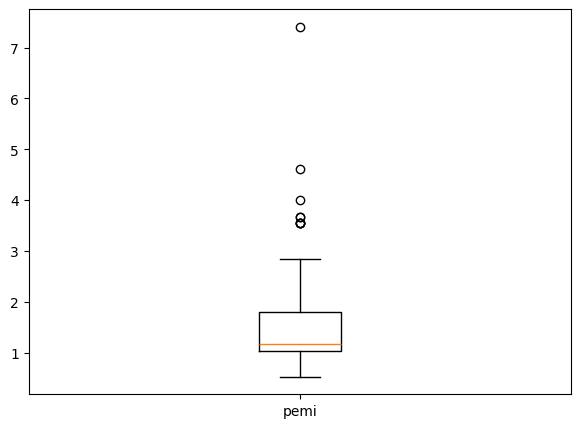

In [117]:
plt.figure(figsize=(7, 5))
plt.boxplot(df['pemi'], tick_labels=['pemi'])
plt.show()

In [118]:
def check_skewness(df, column):
    skewness = df[column].skew()
    print(f'Skewness of {column}: {skewness:.4f}')
    if skewness >= 1:
        print(f'{column} is highly right-skewed.')
    elif skewness <= -1:
        print(f'{column} is highly left-skewed.')
    elif skewness >= 0.5:
        print(f'{column} is moderately right-skewed.')
    elif skewness <= -0.5:
        print(f'{column} is moderately left-skewed.')
    else:
        print(f'{column} is approximately symmetric.')
    return skewness

# Example usage:
check_skewness(df, 'size_kloc')
check_skewness(df, 'act_effort')
check_skewness(df, 'pemi')

Skewness of size_kloc: 3.5378
size_kloc is highly right-skewed.
Skewness of act_effort: 4.3483
act_effort is highly right-skewed.
Skewness of pemi: 2.7264
pemi is highly right-skewed.


np.float64(2.7264466608252786)

### Comments
- Act_effort is heavily skewed
- We are using Trees that are less sensitive to outliers
- But we still should at least apply data transformation. 
- We can say that this right skewed so we should log transform as these are the most suitable, as these makes our data more normal
- you can see that on our histograms

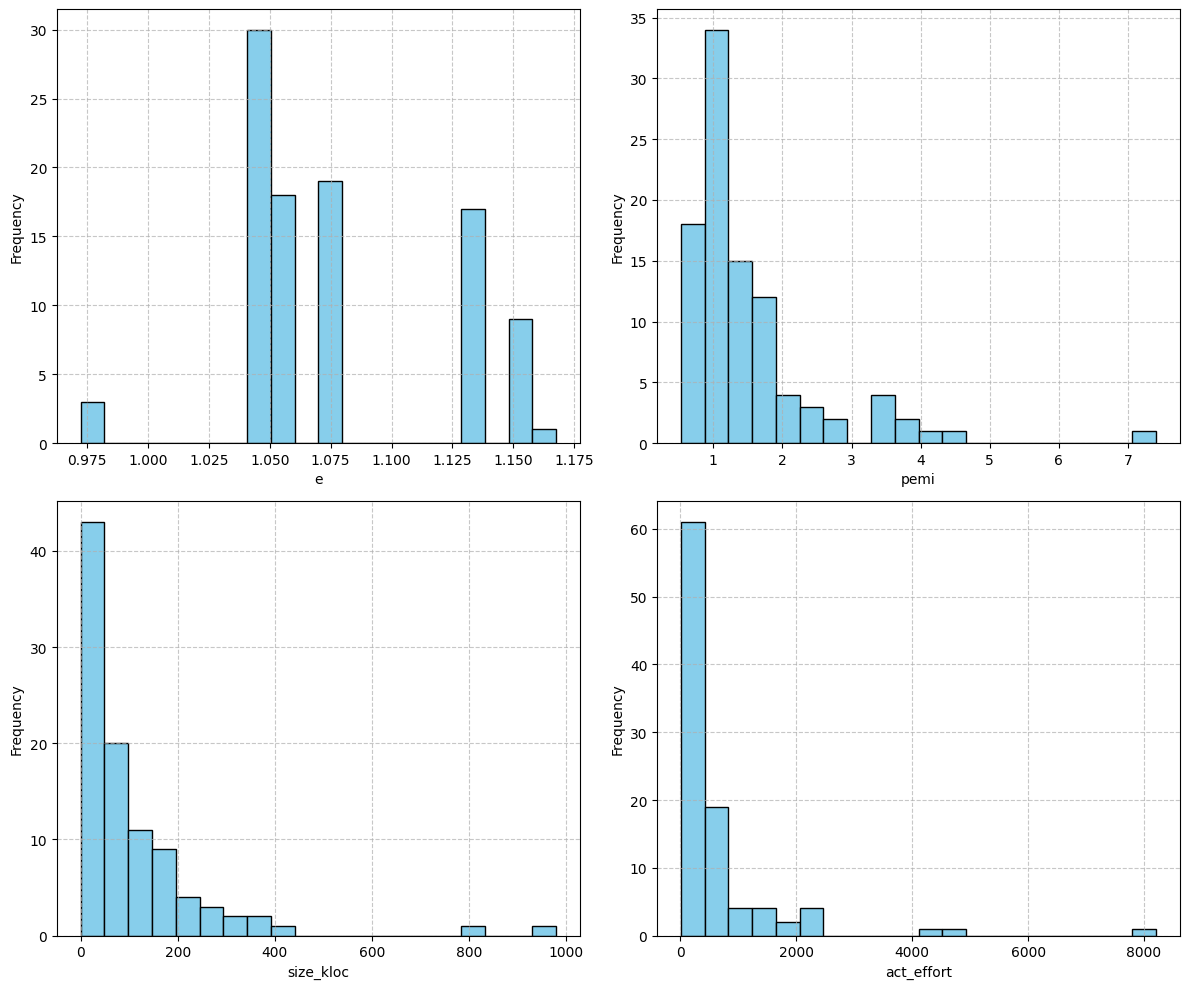

In [119]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # flatten to iterate easily

# Loop through each feature/axis and plot its histogram along with skewness in the title
columns = df.drop(columns=["proj.no.", "red.br"]).columns
for ax, col in zip(axs, columns):
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [120]:
df = df.drop(df[df['size_kloc'] == 0].index)

--- Outlier Investigation Report ---

--- Investigating Feature: e ---
Q1: 1.04, Q3: 1.14, IQR: 0.10
Lower Bound (Q1 - 1.5*IQR): 0.90
Upper Bound (Q3 + 1.5*IQR): 1.28
Number of outliers detected: 0 (0.00%)
No outliers detected based on IQR method.


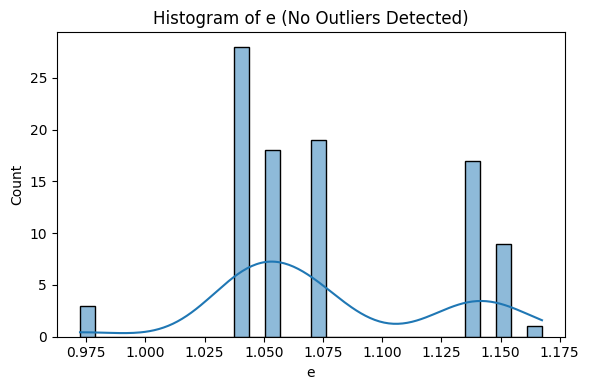


--- Investigating Feature: act_effort ---
Q1: 65.10, Q3: 587.50, IQR: 522.40
Lower Bound (Q1 - 1.5*IQR): -718.50
Upper Bound (Q3 + 1.5*IQR): 1371.10
Number of outliers detected: 10 (10.53%)

Rows identified as outliers for 'act_effort':
         e  act_effort      pemi  size_kloc
70  1.0412      2400.0  0.964921      302.0
73  1.0724      2400.0  0.530046      423.0
76  1.0724      2120.0  1.068011      219.0
78  1.0724      4560.0  2.749666      980.0
80  1.1363      2460.0  1.808376      271.0
91  1.1363      4178.2  3.547812      165.0
92  1.1363      1772.5  3.547812       65.0
93  1.1363      1645.9  3.547812       70.0
94  1.1363      1924.5  4.606860       50.0
96  1.1363      8211.0  3.547812      233.0

Summary statistics for 'act_effort':
Outliers:
count      10.000000
mean     3167.210000
std      2027.031977
min      1645.900000
25%      1973.375000
50%      2400.000000
75%      3748.650000
max      8211.000000
Name: act_effort, dtype: float64

Non-Outliers:
count      85.

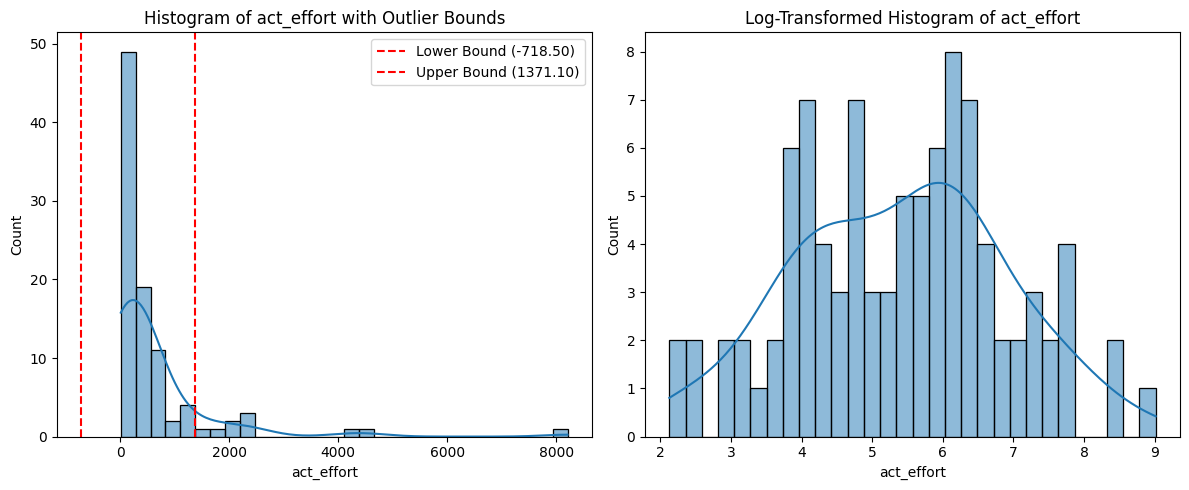


--- Investigating Feature: pemi ---
Q1: 1.02, Q3: 1.81, IQR: 0.79
Lower Bound (Q1 - 1.5*IQR): -0.16
Upper Bound (Q3 + 1.5*IQR): 3.00
Number of outliers detected: 9 (9.47%)

Rows identified as outliers for 'pemi':
         e  act_effort      pemi  size_kloc
15  1.1519        12.0  3.671265       6.20
68  1.1519       480.0  3.671265      16.30
88  1.1519      1350.0  7.409528      32.00
91  1.1363      4178.2  3.547812     165.00
92  1.1363      1772.5  3.547812      65.00
93  1.1363      1645.9  3.547812      70.00
94  1.1363      1924.5  4.606860      50.00
95  1.1675       648.0  3.997406       7.25
96  1.1363      8211.0  3.547812     233.00

Summary statistics for 'pemi':
Outliers:
count    9.000000
mean     4.171952
std      1.262987
min      3.547812
25%      3.547812
50%      3.671265
75%      3.997406
max      7.409528
Name: pemi, dtype: float64

Non-Outliers:
count    86.000000
mean      1.273068
std       0.515726
min       0.530046
25%       0.953559
50%       1.137510
75% 

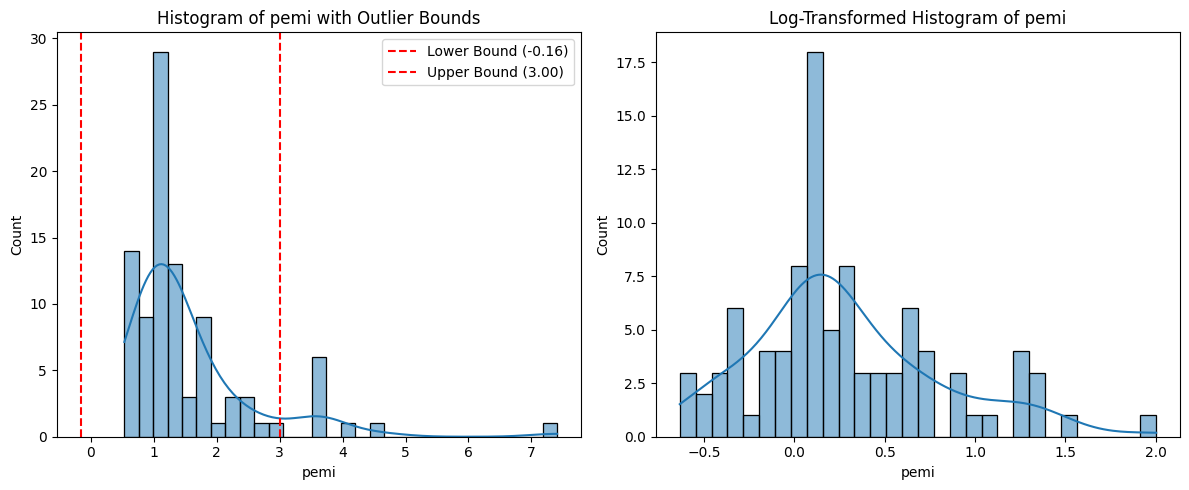


--- Investigating Feature: size_kloc ---
Q1: 20.50, Q3: 140.50, IQR: 120.00
Lower Bound (Q1 - 1.5*IQR): -159.50
Upper Bound (Q3 + 1.5*IQR): 320.50
Number of outliers detected: 6 (6.32%)

Rows identified as outliers for 'size_kloc':
         e  act_effort      pemi  size_kloc
36  1.0412        50.0  1.137510      800.0
52  1.1519       444.0  1.211706      339.0
73  1.0724      2400.0  0.530046      423.0
78  1.0724      4560.0  2.749666      980.0
79  1.1519       720.0  0.696363      350.0
86  1.0724      1200.0  1.360596      352.0

Summary statistics for 'size_kloc':
Outliers:
count      6.000000
mean     540.666667
std      278.111968
min      339.000000
25%      350.500000
50%      387.500000
75%      705.750000
max      980.000000
Name: size_kloc, dtype: float64

Non-Outliers:
count     89.000000
mean      77.515169
std       75.169843
min        2.000000
25%       20.000000
50%       50.000000
75%      100.000000
max      302.000000
Name: size_kloc, dtype: float64


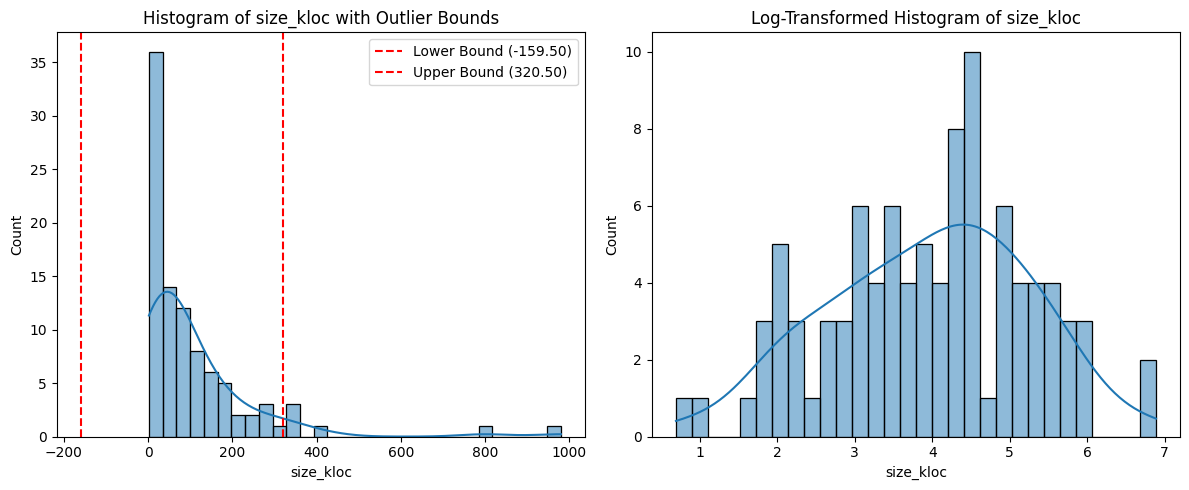

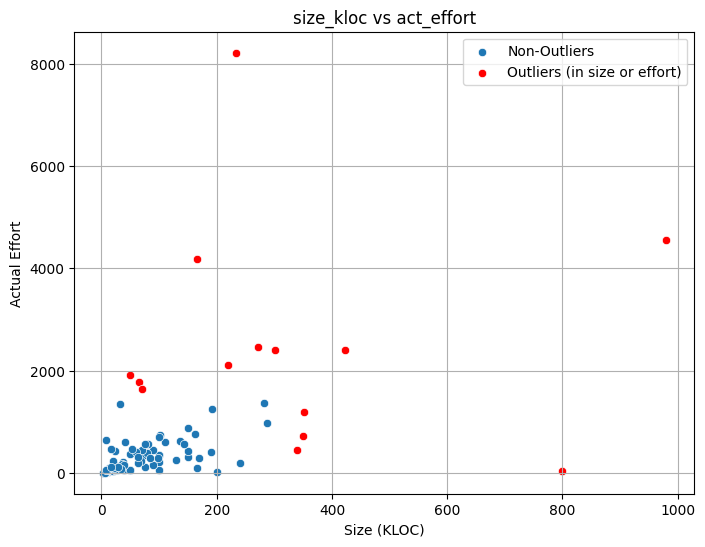

In [121]:
features_to_investigate = ['e', 'act_effort', 'pemi', 'size_kloc']

print("--- Outlier Investigation Report ---")

for feature in features_to_investigate:
    print(f"\n--- Investigating Feature: {feature} ---")

    feature_data = df[feature]

    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")

    outliers_mask = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    outliers = df[outliers_mask]
    non_outliers = df[~outliers_mask] # outside of outliers ~ / everything else

    num_outliers = outliers.shape[0]
    total_points = df[feature].notna().sum() # Count non-NA points
    if total_points > 0:
      percentage_outliers = (num_outliers / total_points) * 100
      print(f"Number of outliers detected: {num_outliers} ({percentage_outliers:.2f}%)")
    else:
       print("Number of outliers detected: 0 (No data points)")


    if num_outliers > 0:
        print(f"\nRows identified as outliers for '{feature}':")
        # Display the outliers - show the feature value and potentially related columns
        # Adjust columns shown as needed, e.g., include a project ID if available
        display_cols = [col for col in features_to_investigate if col in df.columns]
        print(outliers[display_cols])

        print(f"\nSummary statistics for '{feature}':")
        print("Outliers:")
        print(outliers[feature].describe())
        print("\nNon-Outliers:")
        print(non_outliers[feature].describe())

        # --- 5. Visualize Distribution ---
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
        plt.axvline(upper_bound, color='r', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
        plt.title(f'Histogram of {feature} with Outlier Bounds')
        plt.legend()

        # Optional: Log transform visualization if data is highly skewed (like act_effort, size_kloc)
        # Check for non-positive values before log transform
        plt.subplot(1, 2, 2)
        # Add 1 before log if zeros might be present, though checked above
        log_data = np.log(df[feature].replace(0, 1e-6)) # Replace 0 for log
        sns.histplot(log_data, kde=True, bins=30)
        plt.title(f'Log-Transformed Histogram of {feature}')


        plt.tight_layout()
        plt.show()

    else:
        print("No outliers detected based on IQR method.")
        # Still show histogram for context
        plt.figure(figsize=(6, 4))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Histogram of {feature} (No Outliers Detected)')
        plt.tight_layout()
        plt.show()


plt.figure(figsize=(8, 6))

# Recalculate outliers specifically for coloring the plot
q1_size = df['size_kloc'].quantile(0.25)
q3_size = df['size_kloc'].quantile(0.75)
iqr_size = q3_size - q1_size
lb_size = q1_size - 1.5 * iqr_size
ub_size = q3_size + 1.5 * iqr_size
outliers_size_mask = (df['size_kloc'] < lb_size) | (df['size_kloc'] > ub_size)

q1_effort = df['act_effort'].quantile(0.25)
q3_effort = df['act_effort'].quantile(0.75)
iqr_effort = q3_effort - q1_effort
lb_effort = q1_effort - 1.5 * iqr_effort
ub_effort = q3_effort + 1.5 * iqr_effort
outliers_effort_mask = (df['act_effort'] < lb_effort) | (df['act_effort'] > ub_effort)

# Combine masks: an outlier in either feature
combined_outliers_mask = outliers_size_mask | outliers_effort_mask

# Plot non-outliers
sns.scatterplot(data=df[~combined_outliers_mask], x='size_kloc', y='act_effort', label='Non-Outliers')
# Plot outliers
sns.scatterplot(data=df[combined_outliers_mask], x='size_kloc', y='act_effort', color='red', label='Outliers (in size or effort)')

plt.title('size_kloc vs act_effort')
plt.xlabel('Size (KLOC)')
plt.ylabel('Actual Effort')
plt.legend()
plt.grid(True)
plt.show()

- The scatter plot tells there is no general trend, but that also makes sense as just because something took less lines of code, it does not mean that it was not complex. For exmaple our data point with KLOC 233 has act_effort as 8000 this could mean because the project might have been way more complex, for example mathemically or in security or for speed and database. Furthermore perhaps the technology was not there yet to done the project and need a small team for a long time to make it 

In [122]:
from sklearn.preprocessing import RobustScaler, StandardScaler
df['act_effort'] = np.log(df['act_effort'].replace(0, 1e-6)) # Replace 0 for log
df['pemi'] = np.log(df['pemi'].replace(0, 1e-6))
df['size_kloc'] = np.log(df['size_kloc'].replace(0, 1e-6))

In [ ]:
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[['pemi', 'e', 'size_kloc', 'act_effort']] = scaler.fit_transform(df[['pemi', 'e', 'size_kloc', 'act_effort']] )

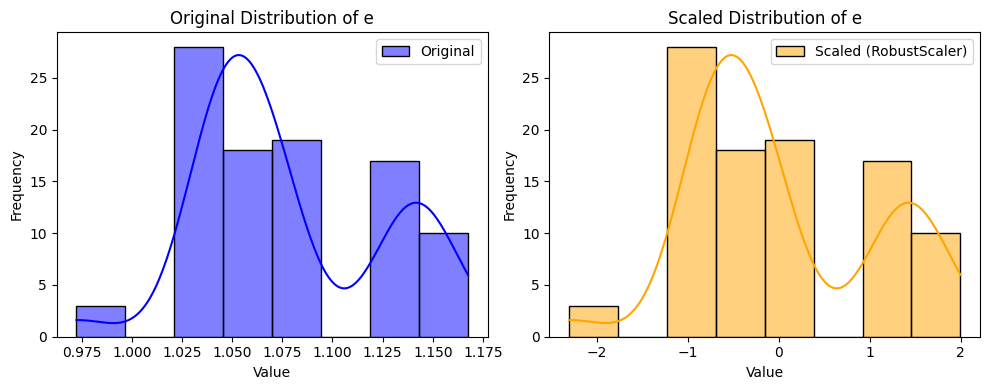

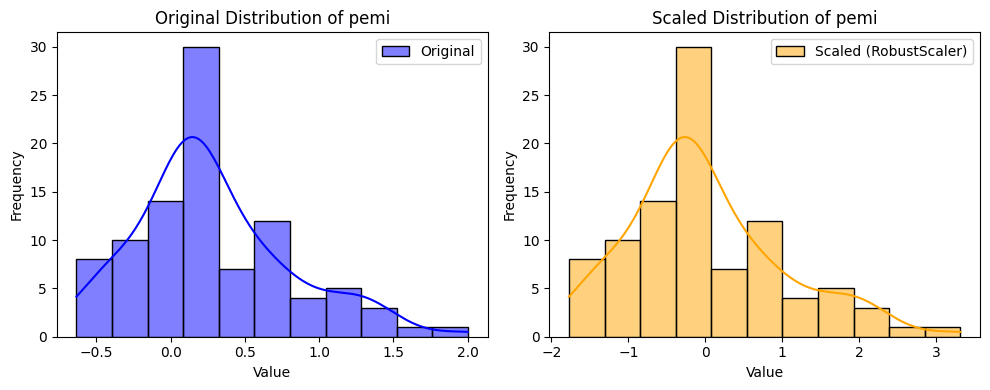

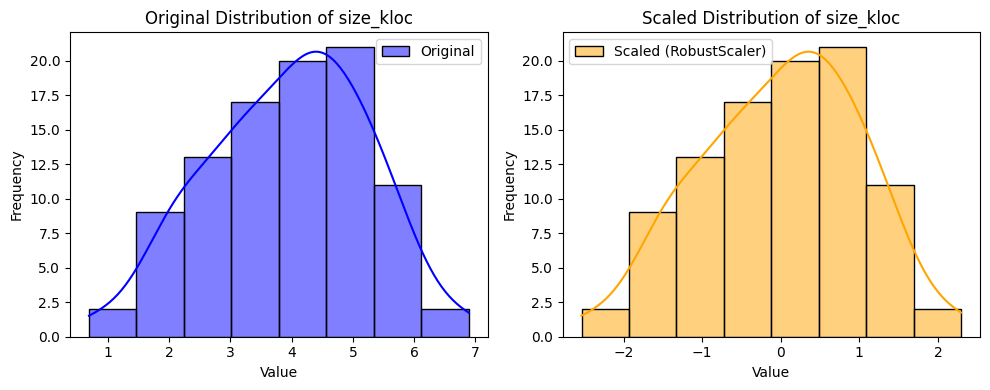

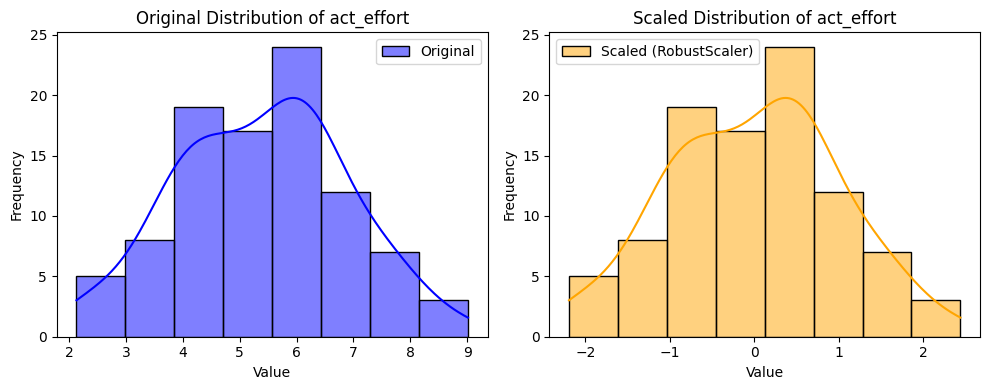

In [124]:

for i, feature in enumerate(columns):
    plt.figure(figsize=(10, 4)) # Create a new figure for each feature

    # Subplot for original data
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
    sns.histplot(df[feature], kde=True, label='Original', color='blue')
    plt.title(f'Original Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Subplot for scaled data
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
    sns.histplot(df_scaled[feature], kde=True, label='Scaled (RobustScaler)', color='orange')
    plt.title(f'Scaled Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()